# Master Thesis Johanna Schulz
Econometric Analysis, Brand Crisis Moderation, DAX30

## Import Packages and Datasets

A list of required packages is imported. The data is imported from the csv files.
pip install of packages is required.

In [134]:
%pip install ipywidgets

1128752.62s - pydevd: Sending message related to process being replaced timed-out after 5 seconds



[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


import sys
import subprocess

def install(package):
    subprocess.check_call([sys.executable, "-m", "pip", "install", package])

##### List of required packages
required_packages = ['pandas', 'numpy', 'openpyxl']

##### Install missing packages
for package in required_packages:
    try:
        __import__(package)
    except ImportError:
        install(package)


%pip install pandas openpyxl

In [106]:
import pandas as pd
import os

# path
data_folder = '../data/yahoo_finance/'
all_files = os.listdir(data_folder)
csv_files = [f for f in all_files if f.endswith('.csv')]

# Create a dictionary of dataframes
dataframes = {}

for file in csv_files:
    # The key is the file name, and the value is the dataframe
    dataframes[file] = pd.read_csv(os.path.join(data_folder, file))

## Data Management

The data that was downloaded from Yahoo Finance is viewed, especially investigating data types, possible outliers or missings. The data is cleaned and prepared for further analysis.

In [107]:
for file_name, df in dataframes.items():
    print(f"DataFrame from file: {file_name}")
    print("first 5 rows of the dataframe.")
    print(df.head())
    print("number of rows and columns:")
    print(df.shape)

DataFrame from file: FRE.F.csv
first 5 rows of the dataframe.
         Date       Open       High        Low      Close  Adj Close  Volume
0  2019-01-02  42.610001  43.500000  42.130001  43.340000  37.775475    6454
1  2019-01-03  42.869999  42.950001  41.259998  41.439999  36.119419    4892
2  2019-01-04  41.520000  44.590000  41.520000  44.189999  38.516342   12699
3  2019-01-07  45.000000  45.000000  43.070000  44.009998  38.359447    6544
4  2019-01-08  44.130001  44.139999  42.830002  43.130001  37.592438    8390
number of rows and columns:
(505, 7)
DataFrame from file: ADS.F.csv
first 5 rows of the dataframe.
         Date        Open        High         Low       Close   Adj Close  \
0  2019-01-02  181.399994  186.149994  181.399994  184.399994  172.554047   
1  2019-01-03  183.750000  185.000000  183.050003  184.500000  172.647629   
2  2019-01-04  185.000000  191.500000  185.000000  191.000000  178.730042   
3  2019-01-07  191.649994  192.449997  189.350006  190.350006  178.12

The column types are inspected to see if they are correctly assigned. As can be seen, the Date column is not correctly assigned, therefore it is changed to datetime data type. Afterwards, the datatype of the columns is checked again to see if the change was successful.

In [108]:
# Inspect column types of the first dataframe (assuming all are similar)
first_key = next(iter(dataframes))
print(f"Column types for {first_key}:")
print(dataframes[first_key].dtypes)


Column types for FRE.F.csv:
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object


In [109]:
# change column Date to datetime in each dataframe
for file_name, df in dataframes.items():
    df['Date'] = pd.to_datetime(df['Date'])

    # overwrite the original dataframe in the dictionary
    dataframes[file_name] = df


In [110]:
# inpect again
first_key = next(iter(dataframes))
print(f"Column types for {first_key}:")
print(dataframes[first_key].dtypes)

## outcome: correct column type now

Column types for FRE.F.csv:
Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object


In [111]:
# consistency across all dataframes is confirmed
for file_name, df in dataframes.items():
    print(f"Column types in file: {file_name}")
    print(df.dtypes)
    print("-" * 50)

Column types in file: FRE.F.csv
Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object
--------------------------------------------------
Column types in file: ADS.F.csv
Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object
--------------------------------------------------
Column types in file: MBG.F.csv
Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object
--------------------------------------------------
Column types in file: EOAN.F.csv
Date         datetime64[ns]
Open                float64
High                float64
Low 

### Data Visualization (descriptive)
Next, the stock price developments are visually explored to get a first understanding of the data and to identify potential outliers. 
Following, the stock prices (closing) are plotted as a time series. 

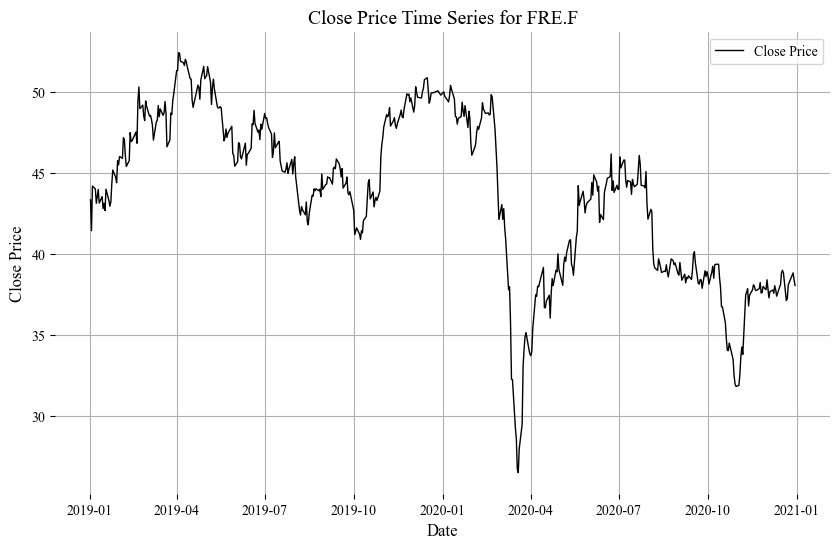

<Figure size 640x480 with 0 Axes>

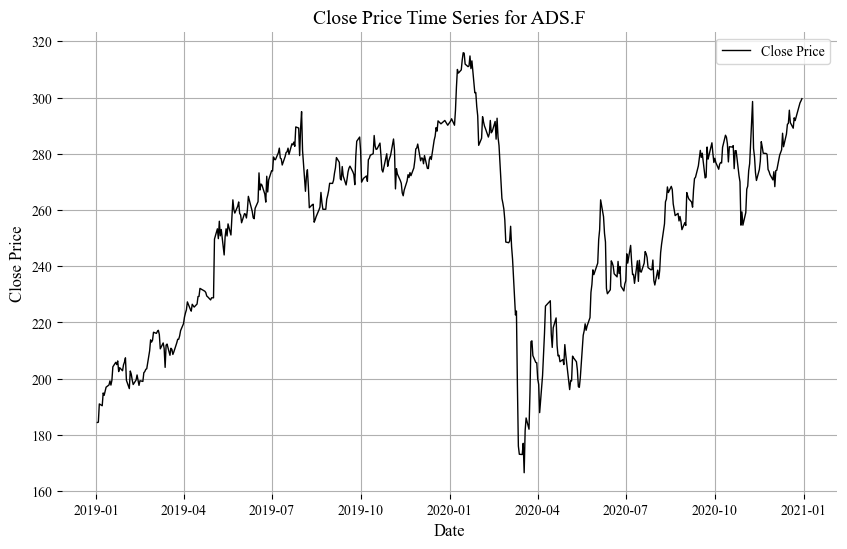

<Figure size 640x480 with 0 Axes>

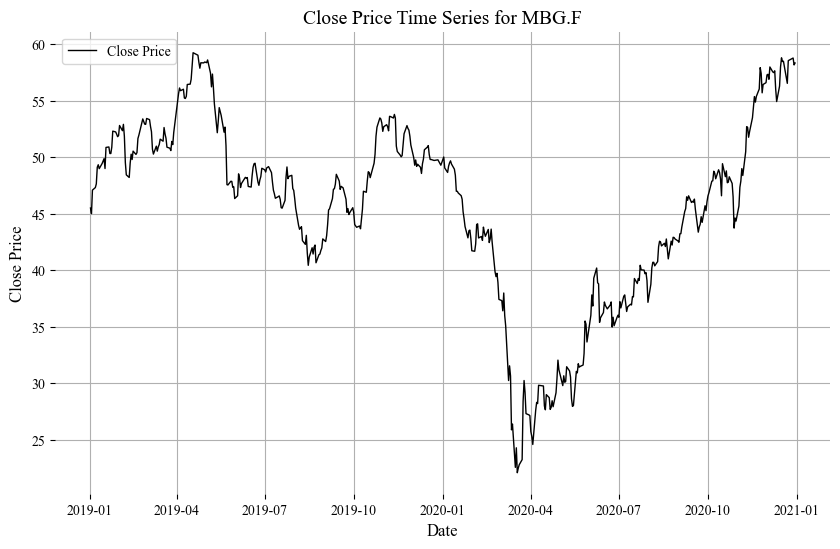

<Figure size 640x480 with 0 Axes>

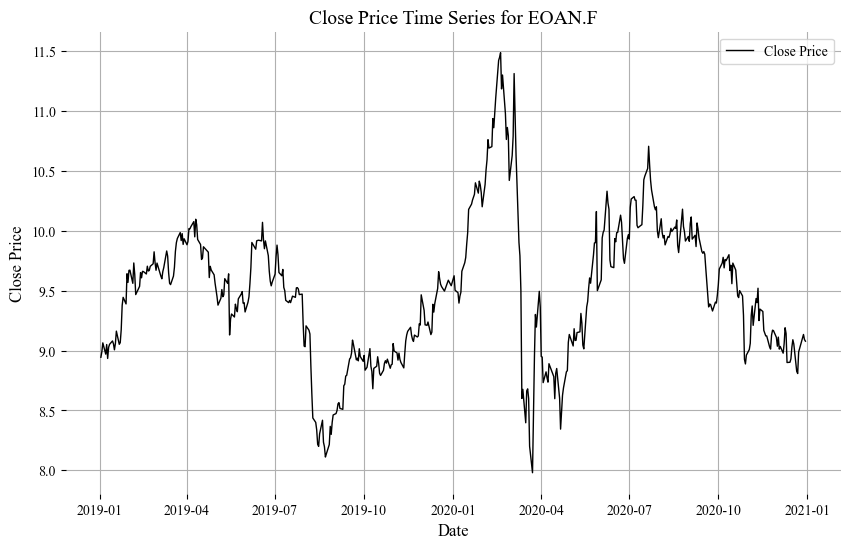

<Figure size 640x480 with 0 Axes>

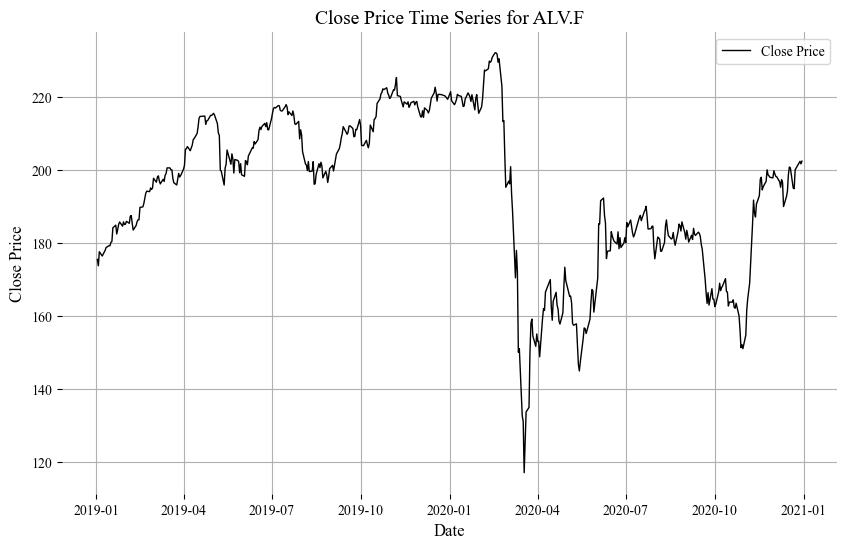

<Figure size 640x480 with 0 Axes>

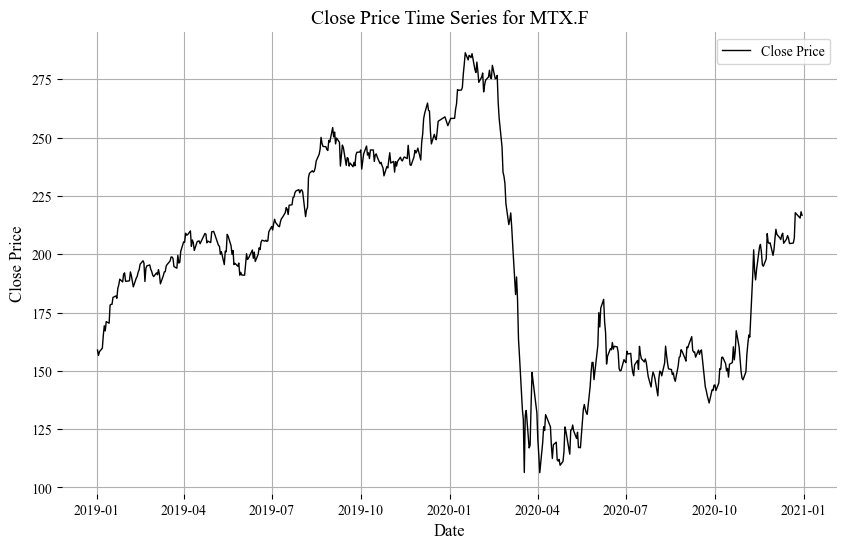

<Figure size 640x480 with 0 Axes>

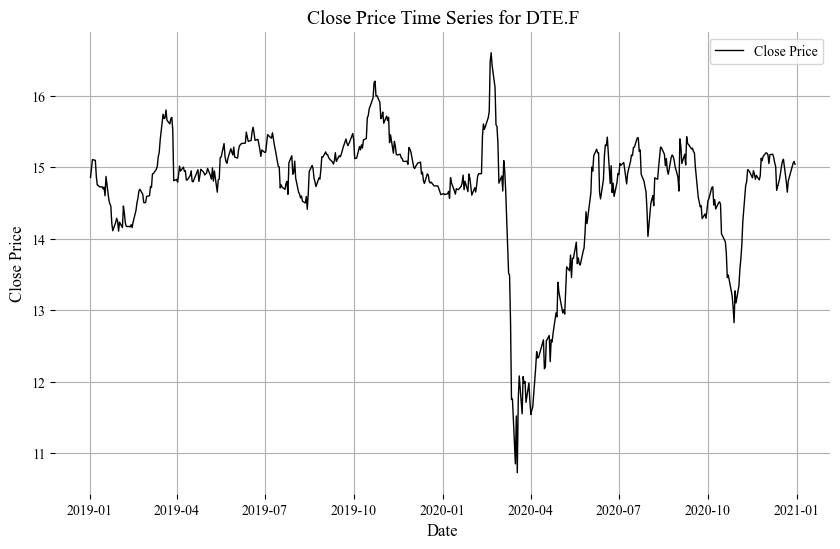

<Figure size 640x480 with 0 Axes>

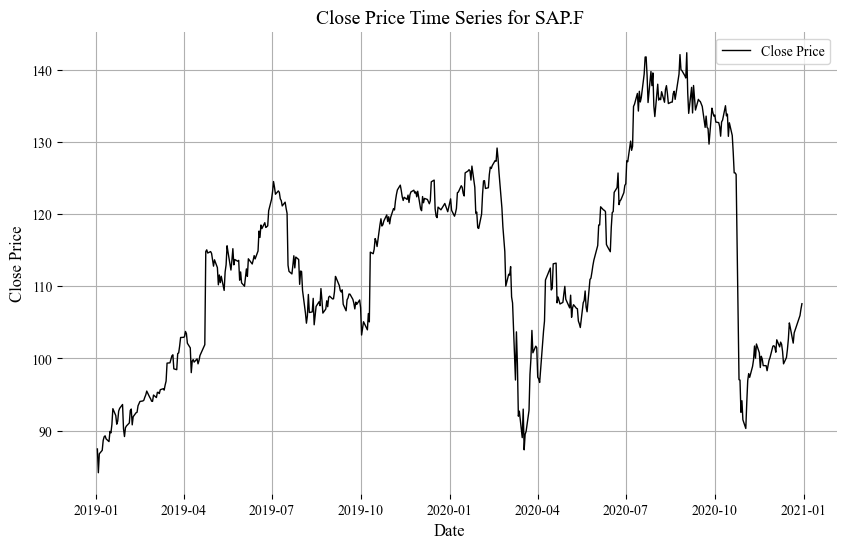

<Figure size 640x480 with 0 Axes>

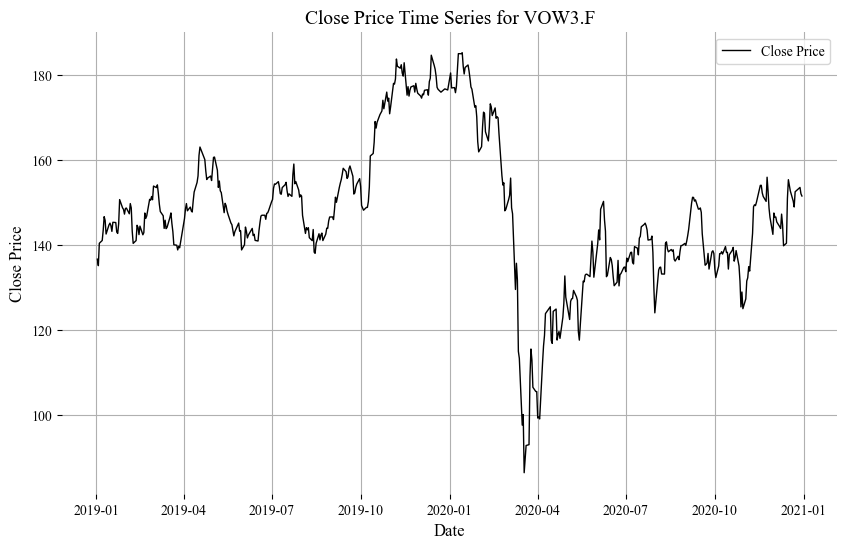

<Figure size 640x480 with 0 Axes>

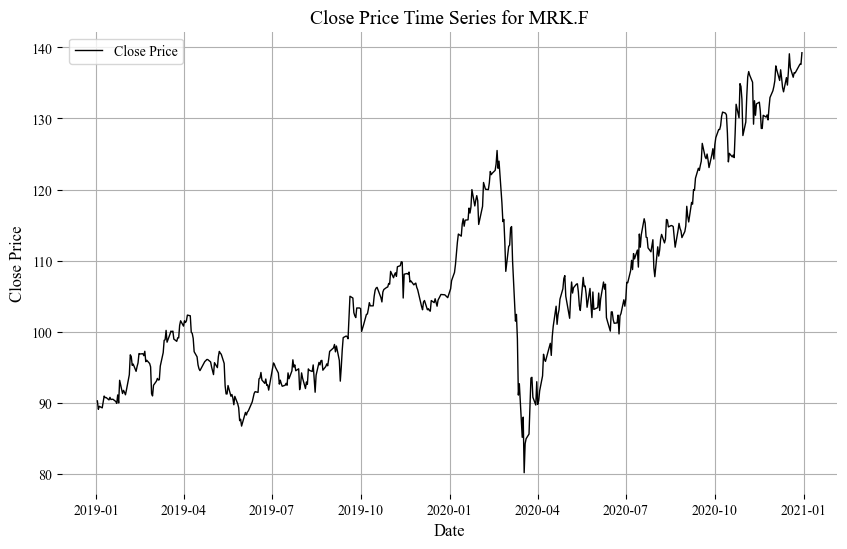

<Figure size 640x480 with 0 Axes>

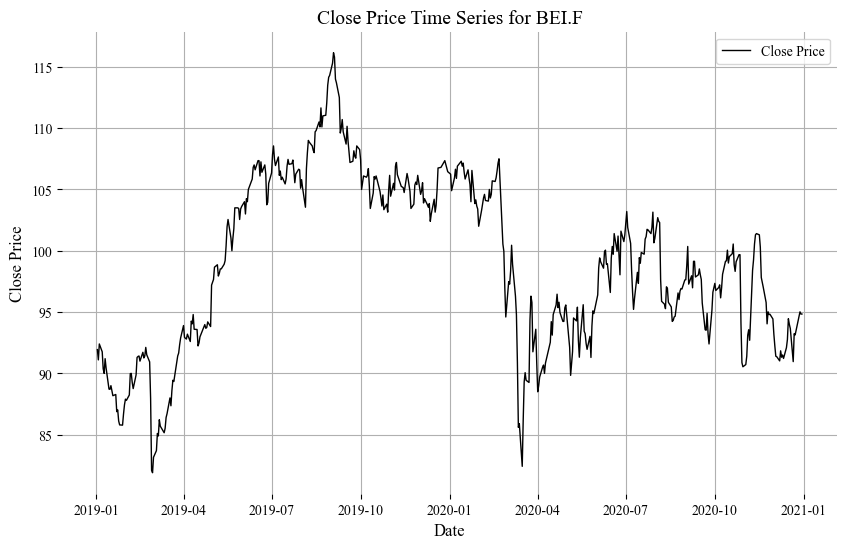

<Figure size 640x480 with 0 Axes>

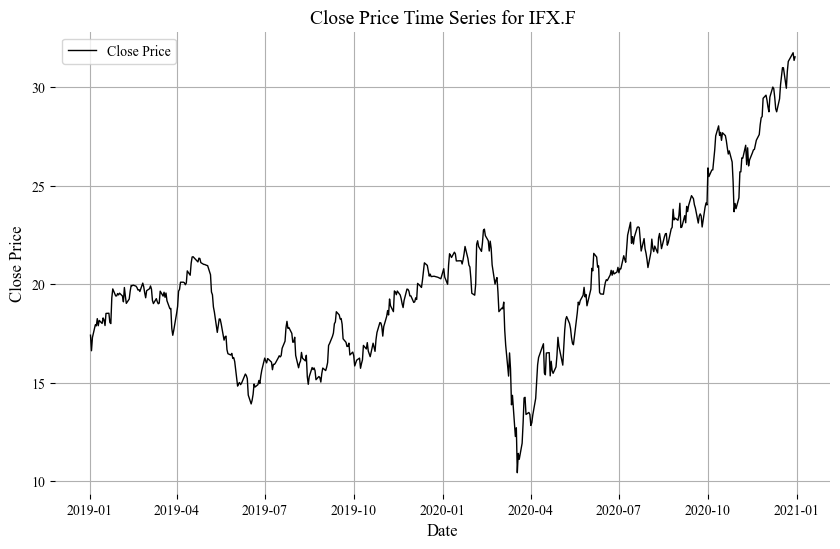

<Figure size 640x480 with 0 Axes>

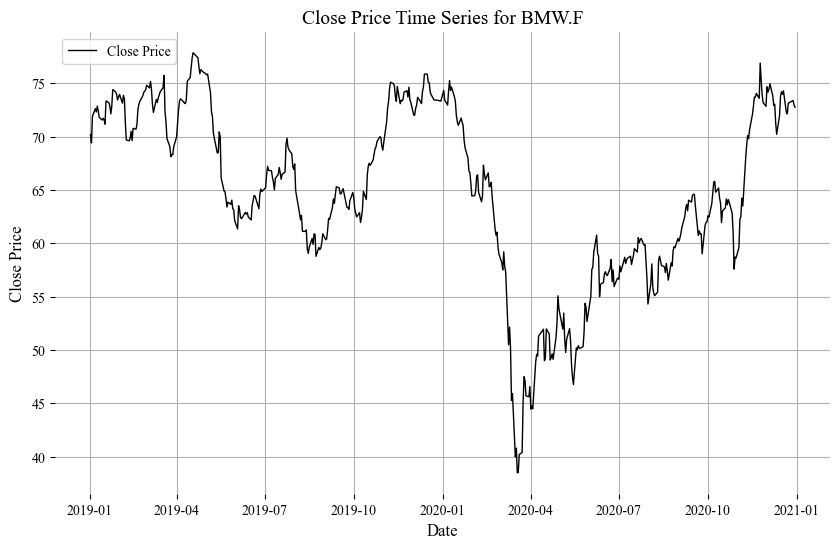

<Figure size 640x480 with 0 Axes>

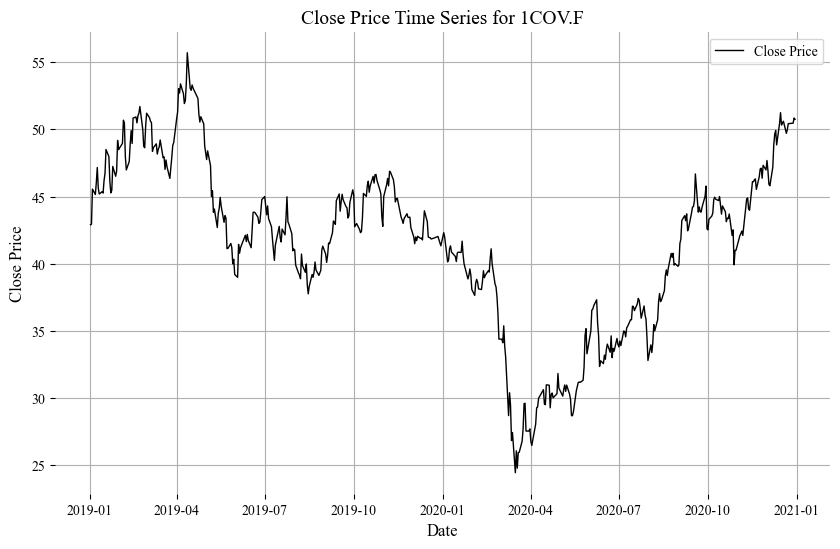

<Figure size 640x480 with 0 Axes>

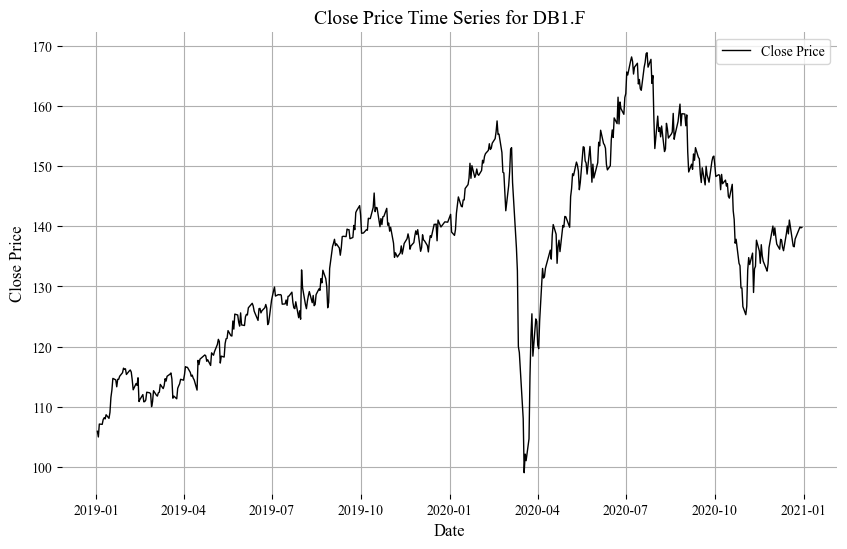

<Figure size 640x480 with 0 Axes>

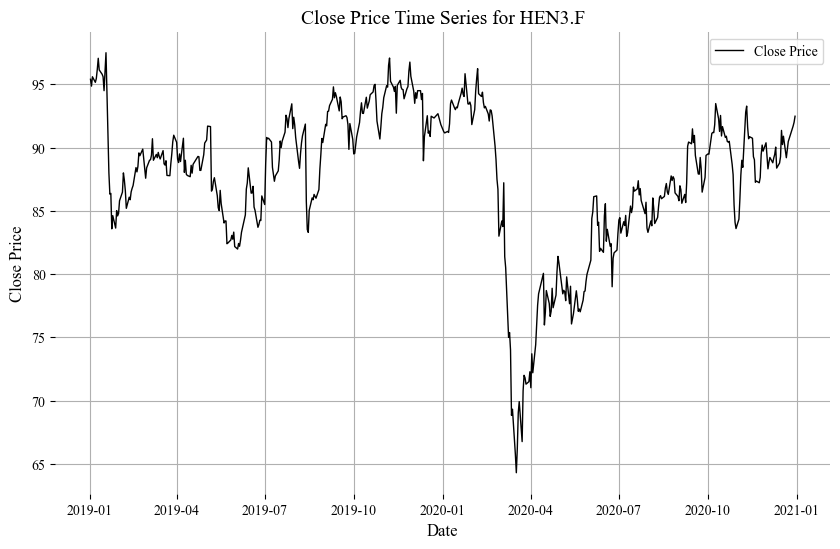

<Figure size 640x480 with 0 Axes>

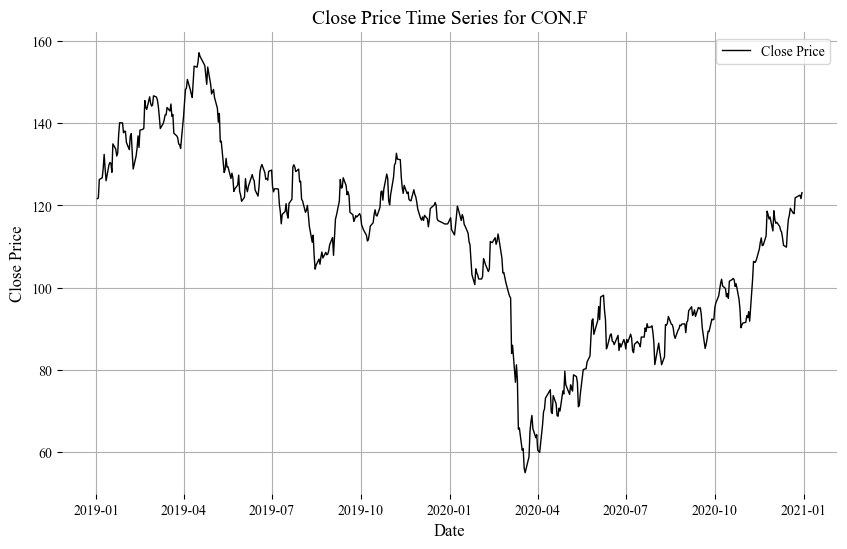

<Figure size 640x480 with 0 Axes>

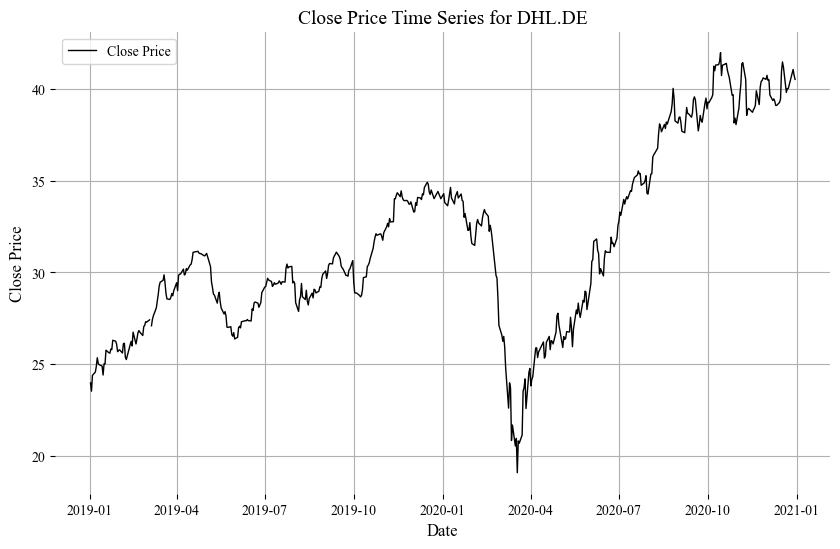

<Figure size 640x480 with 0 Axes>

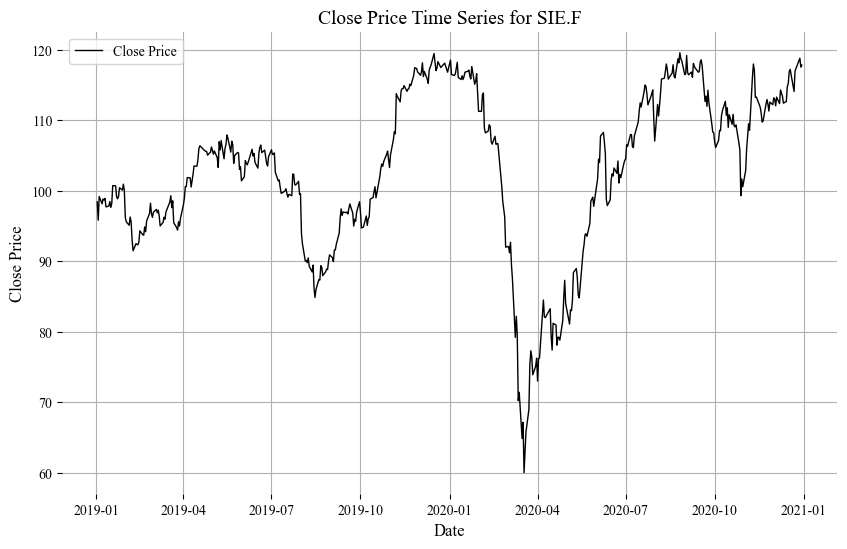

<Figure size 640x480 with 0 Axes>

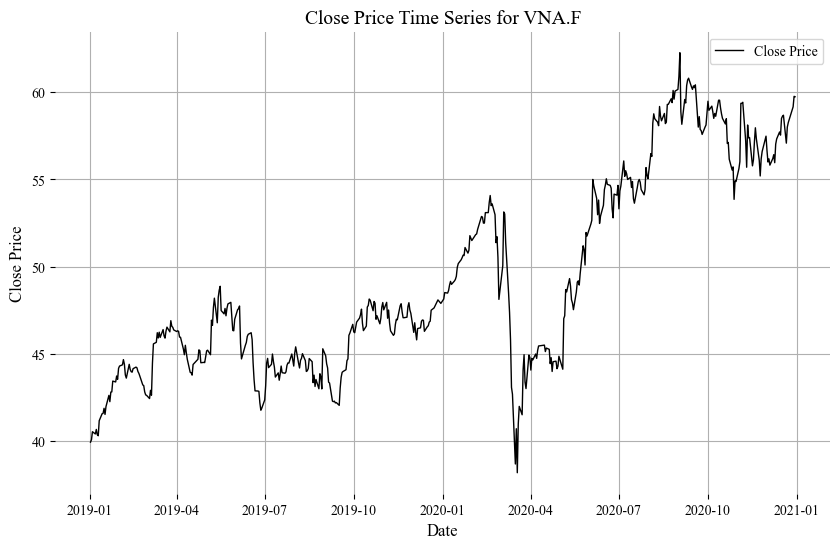

<Figure size 640x480 with 0 Axes>

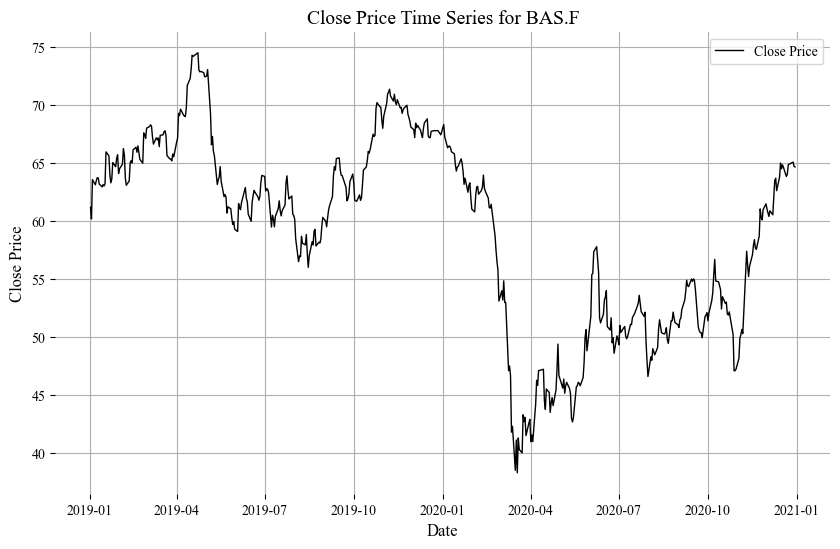

<Figure size 640x480 with 0 Axes>

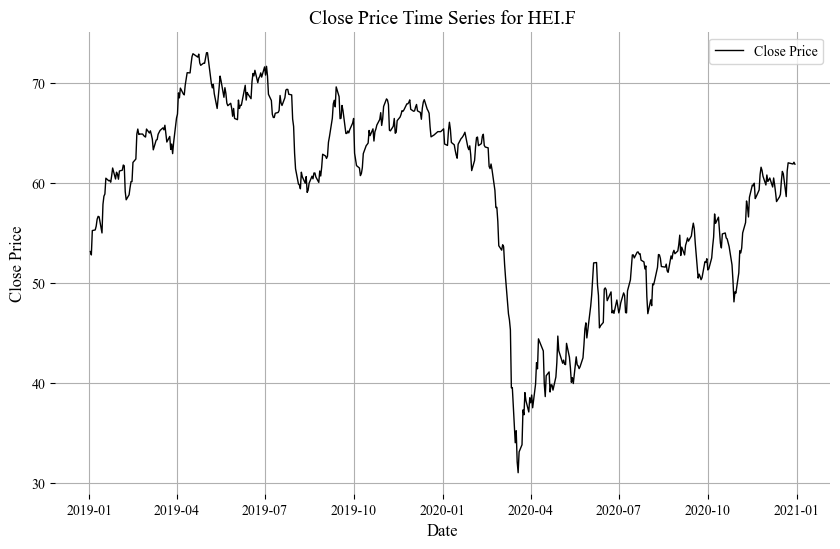

<Figure size 640x480 with 0 Axes>

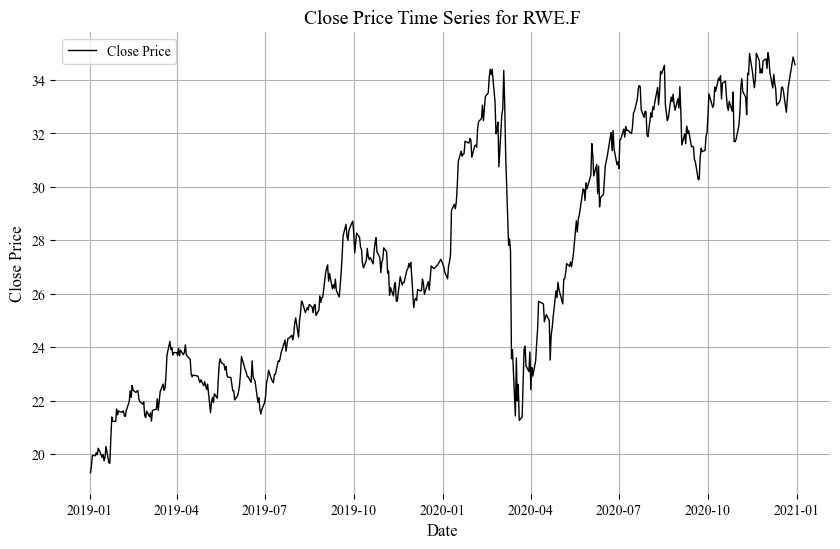

<Figure size 640x480 with 0 Axes>

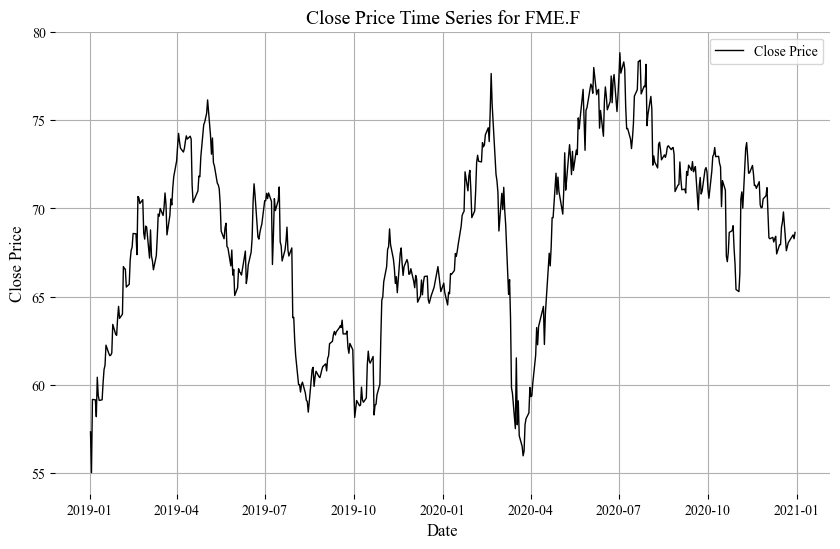

<Figure size 640x480 with 0 Axes>

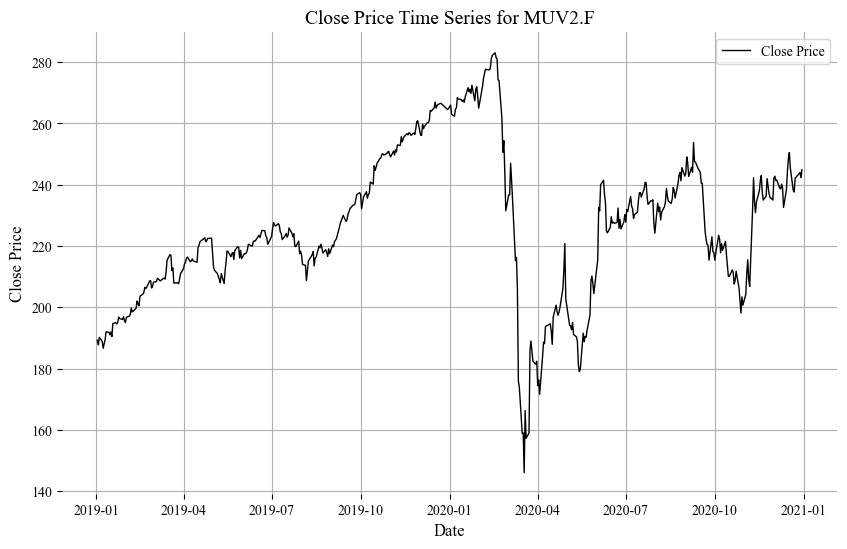

<Figure size 640x480 with 0 Axes>

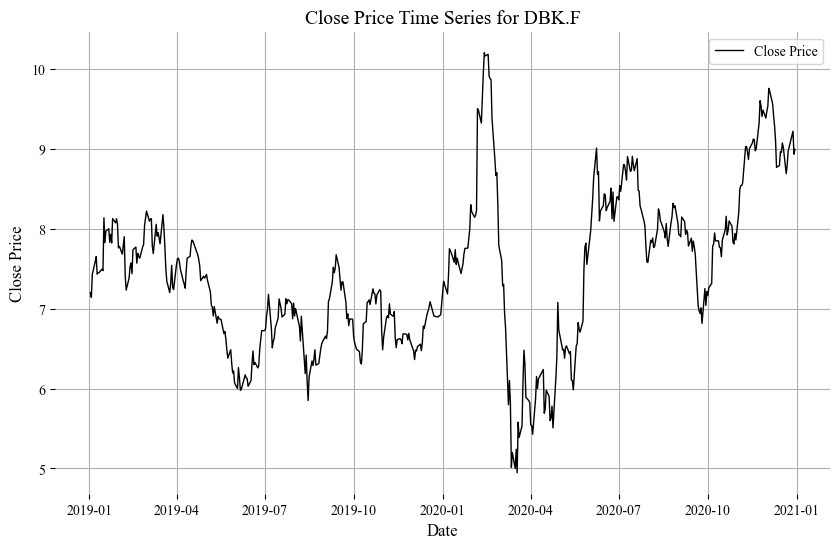

<Figure size 640x480 with 0 Axes>

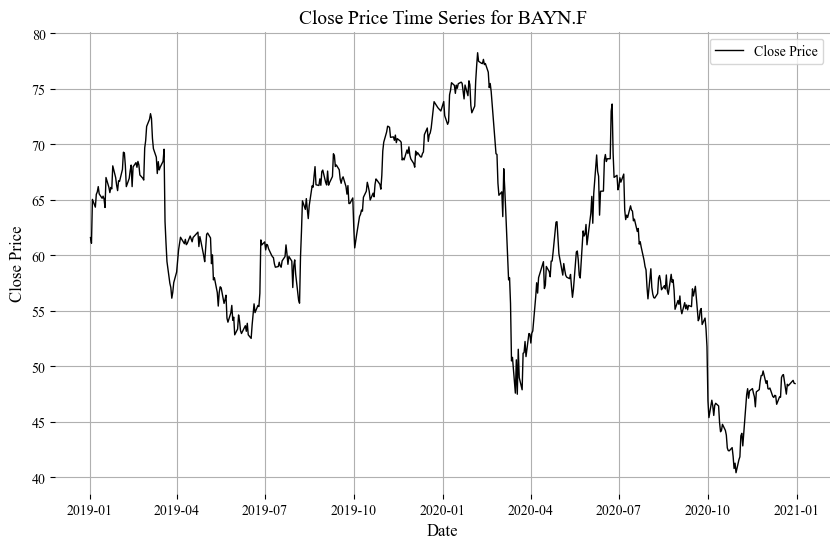

<Figure size 640x480 with 0 Axes>

In [112]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

for file_name, df in dataframes.items():
    # plot 'Close' prices
    plt.figure(figsize=(10, 6))  # size of the plot
    plt.plot(df['Date'], df['Close'], label='Close Price', color='black', linewidth=1)

    title_name = file_name[:-4]  # remove '.csv' from the file name  

    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_visible(False)
    plt.gca().spines['left'].set_visible(False)

    plt.title(f"Close Price Time Series for {title_name}", fontsize=14)  
    plt.xlabel('Date', fontsize=12)  
    plt.ylabel('Close Price', fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

    plt.grid(True)  # Adding gridlines
    plt.legend(fontsize=10)    

    plt.show()  # Display the plot
    # If you want to save the plot instead, use plt.savefig('path/to/save/figure.png')

    # Optional: Clear the current figure after each plot to prevent overlap
    plt.clf()


Now, I create a matrix of the plots and save it as a png to be able to use it in the thesis.

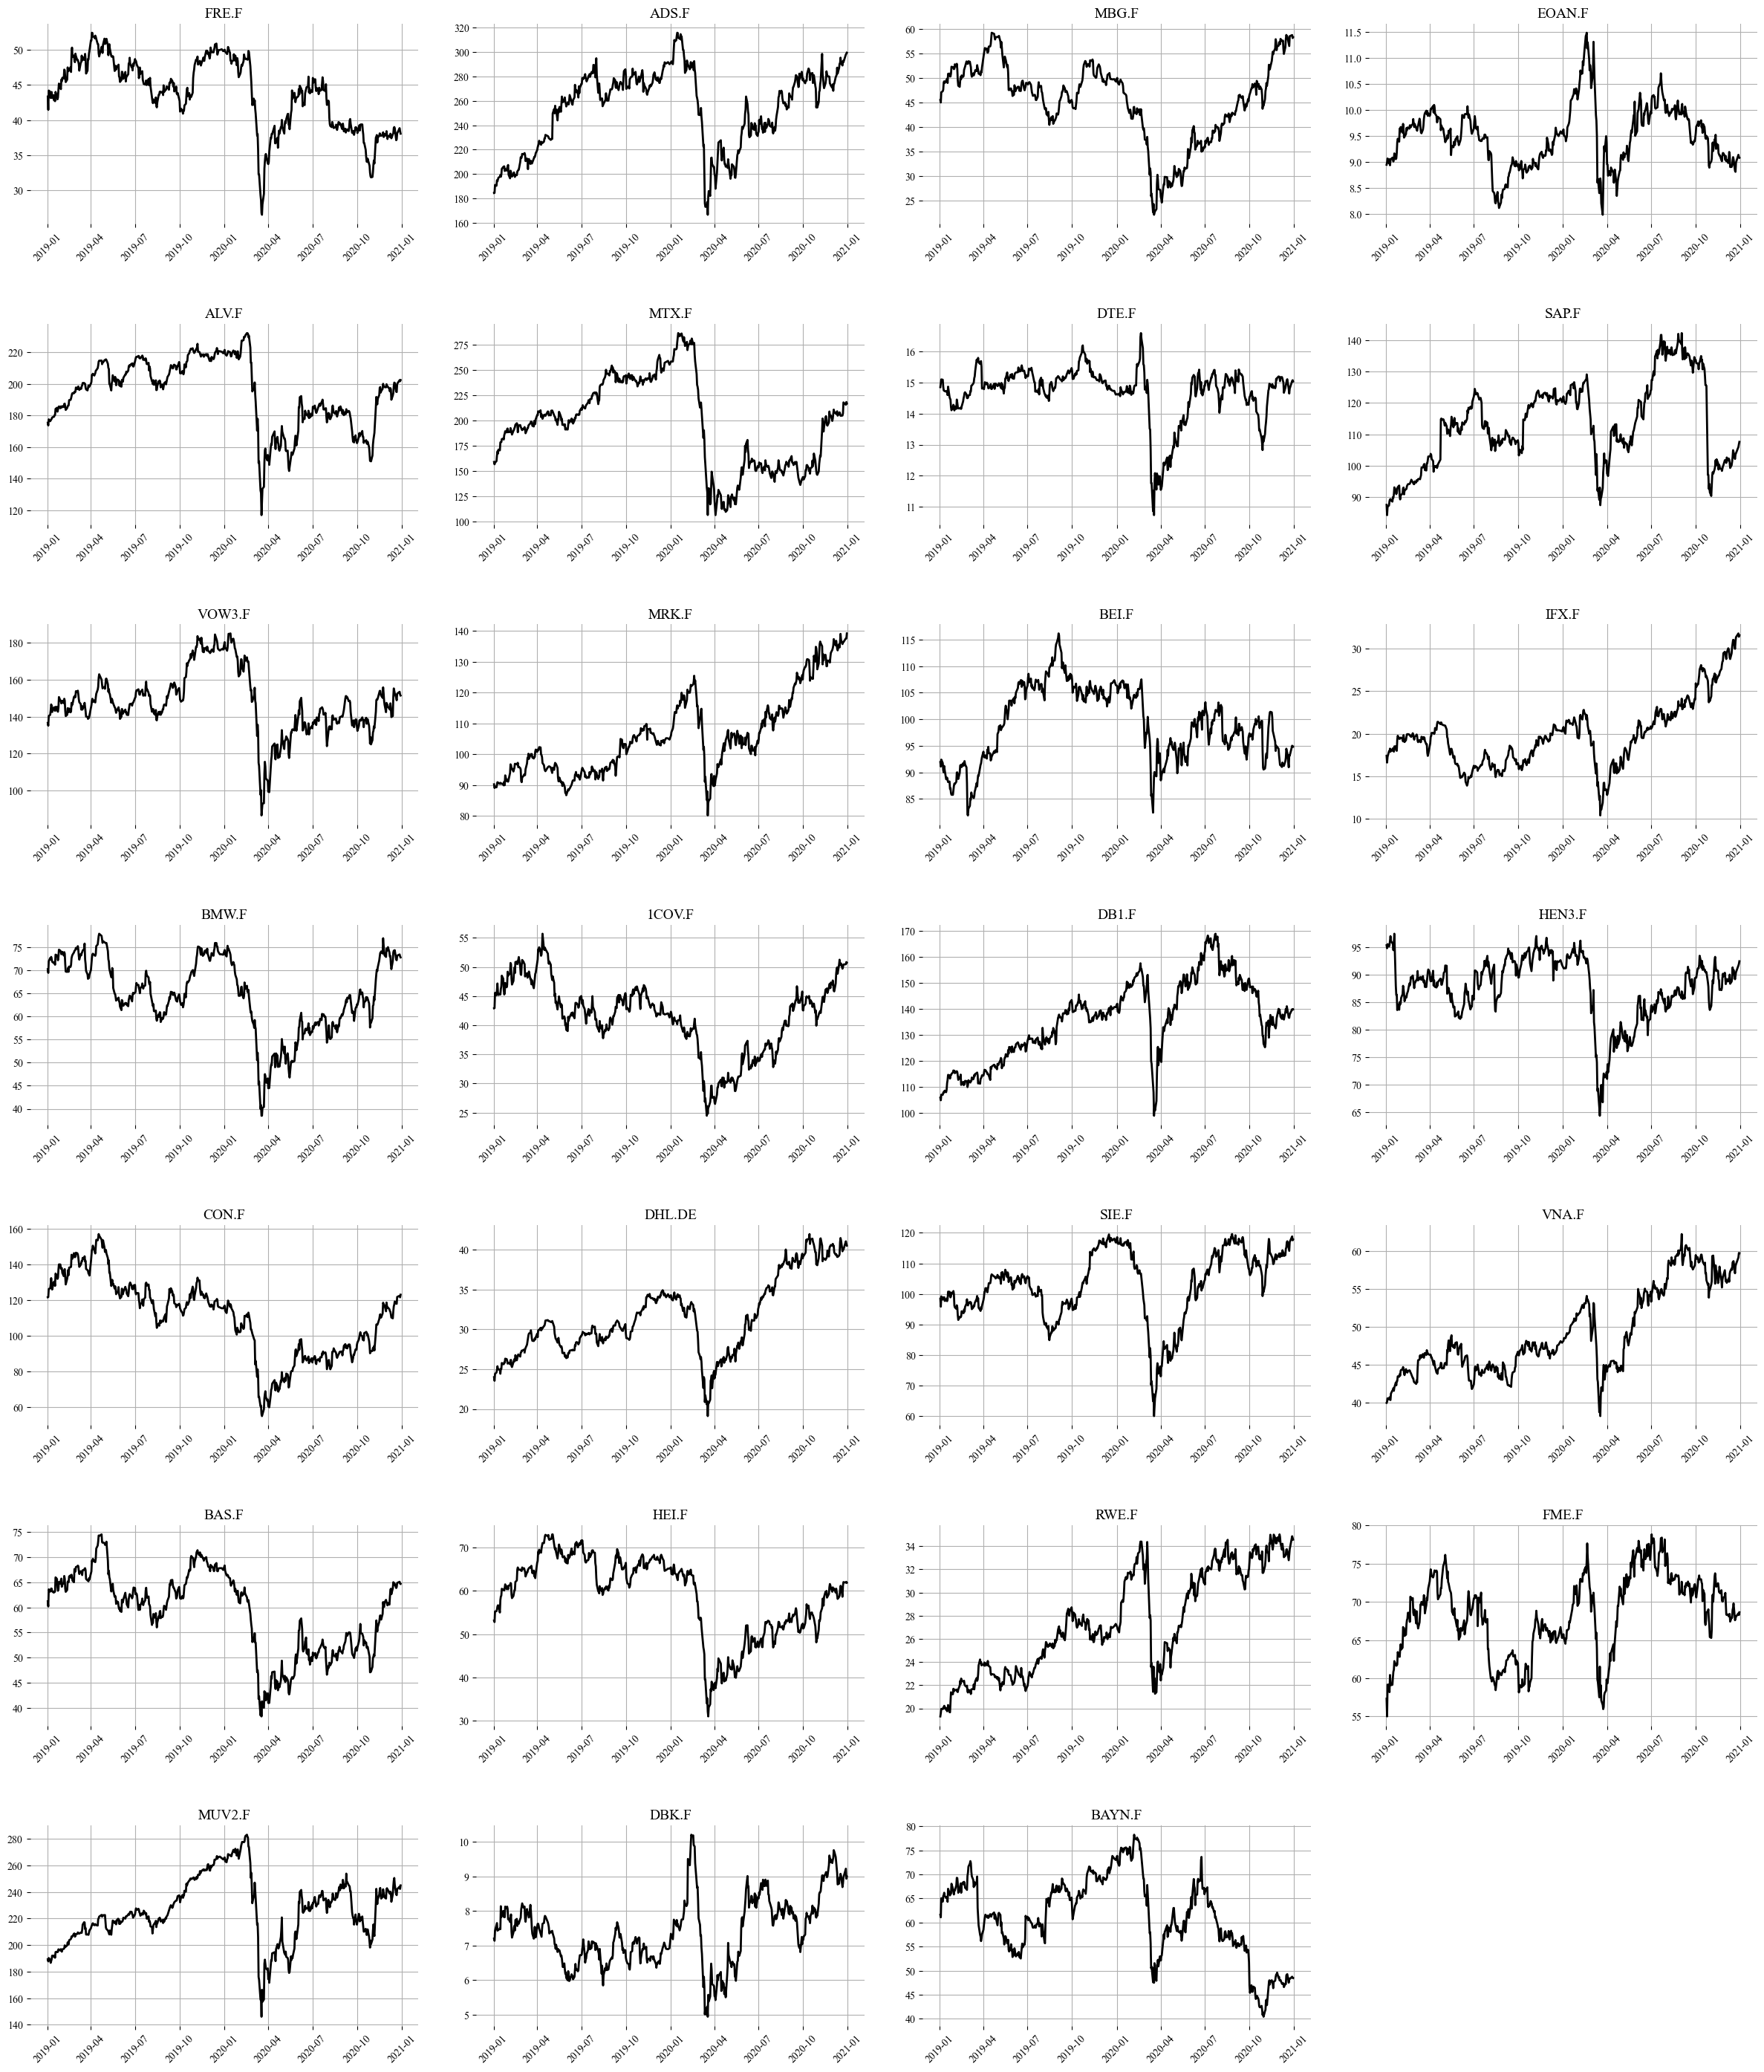

In [113]:
import math

# number of dataframes
num_plots = len(dataframes)
# number of columns
num_columns = 4
# Calculate the number of rows needed
num_rows = math.ceil(num_plots / num_columns)

# Create a figure and a grid of subplots
fig, axs = plt.subplots(num_rows, num_columns, figsize=(30, 5 * num_rows))

# Flatten the array of axes for easy iterating
axs = axs.ravel()

for i, (file_name, df) in enumerate(dataframes.items()):
    # Plotting in the ith subplot
    axs[i].plot(df['Date'], df['Close'], color='black', linewidth=2)
    title_name = file_name[:-4]
    axs[i].set_title(f"{title_name}", fontsize=14)

    # Hide spines
    axs[i].spines['top'].set_visible(False)
    axs[i].spines['right'].set_visible(False)
    axs[i].spines['bottom'].set_visible(False)
    axs[i].spines['left'].set_visible(False)

    axs[i].tick_params(axis='x', labelrotation=45)  # Rotate labels for better readability

    axs[i].grid(True)  # Enable gridlines


# Turn off any unused subplots
for j in range(i + 1, num_rows * num_columns):
    axs[j].axis('off')

fig.subplots_adjust(wspace=0.15, hspace=0.5)  # Adjust the width and height space

# Save the entire figure
#plt.savefig('../outputs/stock_prices_matrix.png', dpi=300)

plt.show()


Now, we will look at more descriptive statistics of the stock prices, for example the mean, standard deviation, minimum and maximum (the last once will show us the range of volatility throughout the time period). This is done to get a better understanding of the data and to identify potential outliers. The understanding is needed for the analysis later. 

In [114]:
# describe the dataframes
for file_name, df in dataframes.items():
    print(f"Summary statistics for {file_name}")
    print(df.describe())
    print("-" * 50)

Summary statistics for FRE.F.csv
             Open        High         Low       Close   Adj Close  \
count  505.000000  505.000000  505.000000  505.000000  505.000000   
mean    43.751247   44.198030   43.180198   43.697049   38.925246   
std      5.034726    4.966586    5.152971    5.045745    4.091076   
min     26.730000   27.820000   24.320000   26.520000   23.497803   
25%     39.299999   39.630001   38.830002   39.330002   35.768299   
50%     44.410000   44.915001   43.904999   44.310001   39.654758   
75%     48.119999   48.465000   47.689999   48.005001   42.348316   
max     52.500000   52.660000   52.250000   52.410000   45.680954   

              Volume  
count     505.000000  
mean     4768.477228  
std      7318.384159  
min        75.000000  
25%      1692.000000  
50%      3053.000000  
75%      5045.000000  
max    103597.000000  
--------------------------------------------------
Summary statistics for ADS.F.csv
             Open        High         Low       Close 

### Creation of one data set 
Now, we will create one data set that contains all the individual company CSV files, each representing a different company. This will be the data set that I will use for the econometric analysis. The new column name is 'Company' and the values are the company ticker.
For now, we had a dictionary 'dataframes' where each key was a company name and the value was the corresponding data set.

In [115]:
import pandas as pd

# Example: dataframes = {'CompanyA': df1, 'CompanyB': df2, ...}

# create a 'Company' column for each dataframe and then add them
for company, df in dataframes.items():
    df['Company'] = company[:-4]  # Removing '.csv' from the file name to get the company ticker 

# create one dataset 
dataset = pd.concat(dataframes.values(), ignore_index=True)

View and save the data set as csv and check for missing values, replace NaN with the method: forward filling

In [116]:
# view dataset
print(dataset.head())

# print the whole data set in a csv file
dataset.to_csv('../outputs/dataset_complete.csv', index=False)

## the dataset looks good, now we will test further, if there are any missing values
# check for missing values
print(dataset.isna().sum())

## outcome: 1 missing value in 'Close', Open, High, Low, Adj Close, Volume column. 
# find the row with missing value (the following command prints "True" for the row with missing value)
print(dataset[dataset.isna().any(axis=1)])

## outcome: row 8629: 2019-03-05   NaN   NaN  NaN    NaN        NaN     NaN  DHL.DE
## research online does not suggest any reason for the missing value, I replace the NaN with the value of the day before (called forward filling, which is a common method to deal with missing values in time series data)

# forward fill missing values, replace NaN with the value from the day before
dataset.fillna(method='ffill', inplace=True)

# Check specific row again
print(dataset.iloc[8629])


        Date       Open       High        Low      Close  Adj Close   Volume  \
0 2019-01-02  42.610001  43.500000  42.130001  43.340000  37.775475   6454.0   
1 2019-01-03  42.869999  42.950001  41.259998  41.439999  36.119419   4892.0   
2 2019-01-04  41.520000  44.590000  41.520000  44.189999  38.516342  12699.0   
3 2019-01-07  45.000000  45.000000  43.070000  44.009998  38.359447   6544.0   
4 2019-01-08  44.130001  44.139999  42.830002  43.130001  37.592438   8390.0   

  Company  
0   FRE.F  
1   FRE.F  
2   FRE.F  
3   FRE.F  
4   FRE.F  
Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
Company      0
dtype: int64
           Date  Open  High  Low  Close  Adj Close  Volume Company
8629 2019-03-05   NaN   NaN  NaN    NaN        NaN     NaN  DHL.DE
Date         2019-03-05 00:00:00
Open                   27.530001
High                       27.57
Low                        27.17
Close                      27.42
Adj Close      

### Aggregation of the data
In the next step, the data is aggregated to a monthly frequency. This is done to reduce the noise in the data and to be able to compare the stock prices of the different companies. The aggregation is done by taking the Volume-Weighted-Average-Price (VWAP) of the stock prices of each month.

In [ ]:
import pandas as pd

# Ensure 'Date' has the right format
dataset['Date'] = pd.to_datetime(dataset['Date'])

# 'Month-Year' column because I need to be sure that each month is assigned to a year
dataset['Month-Year'] = dataset['Date'].dt.to_period('M')

# Calculate Price*Volume and then group by 'Company' and 'Month-Year', I will use the closing price (reasons see master thesis docs)
dataset['Price_Volume'] = dataset['Close'] * dataset['Volume']
grouped = dataset.groupby(['Company', 'Month-Year'])

# Calculate VWAP for each group (equation and operationalisation, see master thesis docs)
monthly_vwap_dataset = grouped.apply(lambda x: x['Price_Volume'].sum() / x['Volume'].sum() if x['Volume'].sum() > 0 else 0)

# Reset index to make 'Company' and 'Month-Year' columns
monthly_vwap_dataset = monthly_vwap_dataset.reset_index()
monthly_vwap_dataset.rename(columns={0: 'VWAP'}, inplace=True)

## The resulting 'monthly_vwap' DataFrame will have the VWAP values for each company for each month

# print the head of the dataset
print(monthly_vwap_dataset.head())

# save dataset as csv 
monthly_vwap_dataset.to_csv('../outputs/monthly_vwap_dataset.csv', index=False)

## Descriptive Statistics


### Descriptive Statistics Table

Now, we create a descriptive table for the dataset that can be imported into the thesis. It includes mean, min, max, standard deviation, median, 1st and 3rd quartile and the number of observations for each company for the closing prices.

In [117]:
# Group by 'Company' and calculate descriptive statistics for 'Close' price
descriptive_stats = dataset.groupby('Company')['Close'].describe(percentiles=[.25, .5, .75])

# Adding number of observations
descriptive_stats['count'] = dataset.groupby('Company')['Close'].count()

# Renaming percentiles for clarity
descriptive_stats.rename(columns={'25%': '1st Quartile', '50%': 'Median', '75%': '3rd Quartile', 'count': 'Count', 'mean': 'Mean', 'min': 'Minimum', 'max': 'Maximum'}, inplace=True)

# Adding standard deviation
descriptive_stats['std_dev'] = dataset.groupby('Company')['Close'].std()

descriptive_stats.rename(columns={'std_dev': 'Standard Deviation'}, inplace=True)
                    
# Reordering columns as per your requirement
descriptive_stats = descriptive_stats[['Count', 'Mean', 'Median', 'Standard Deviation','1st Quartile', '3rd Quartile', 'Minimum',  'Maximum']]

# Print the table
print(descriptive_stats)

         Count        Mean      Median  Standard Deviation  1st Quartile  \
Company                                                                    
1COV.F     505   41.504337   42.419998            6.241286     38.320000   
ADS.F      505  253.324673  262.799988           32.481305    227.699997   
ALV.F      505  193.910317  197.759995           21.573388    180.979996   
BAS.F      505   59.033663   61.119999            8.110198     51.980000   
BAYN.F     505   61.190951   61.450001            8.403330     55.990002   
BEI.F      505   99.019267   99.000000            6.999725     93.519997   
BMW.F      505   64.678881   64.779999            8.189484     59.549999   
CON.F      505  110.338416  114.940002           22.096214     91.839996   
DB1.F      505  135.979406  137.399994           15.341278    125.250000   
DBK.F      505    7.439172    7.431000            0.990617      6.714000   
DHL.DE     505   31.557240   30.455000            4.958411     27.959999   
DTE.F      5

In [129]:
!pip install openpyxl


# Export the table to a excel file and round up to three decimal places
descriptive_stats.round(3).to_excel('../outputs/descriptive_stats.xlsx', float_format="%.3f")


590329.41s - pydevd: Sending message related to process being replaced timed-out after 5 seconds



[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


### Descriptive Statistics Graphs

Now, a descriptive graph for the DAX companies is created to show the time series of the stock prices (VWAP aggregated) in one graph. This will give insights into the development of the stock prices over time and will be used in the thesis. Furthermore, this visualization makes it possible to observe whether all companies roughly follow the same trend after the crisis March 2020.

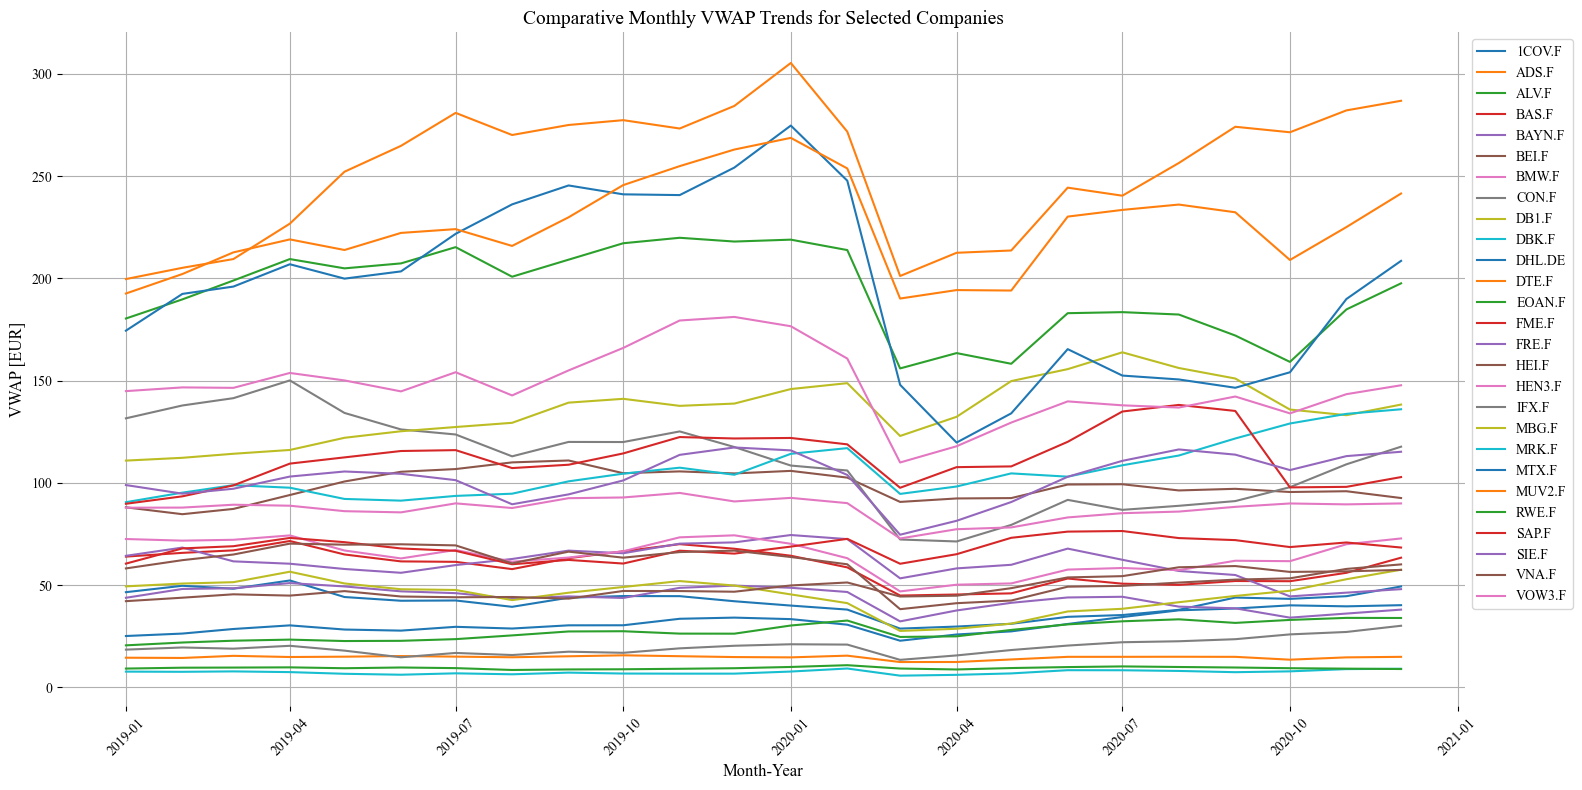

In [128]:
import matplotlib.pyplot as plt
import pandas as pd

# 'Month-Year' as a datetime for plotting
monthly_vwap_dataset['Month-Year'] = pd.to_datetime(monthly_vwap_dataset['Month-Year'].astype(str))

plt.figure(figsize=(15, 8))

# Iterate over each company and plot their VWAP time series
for company in monthly_vwap_dataset['Company'].unique():
    company_data = monthly_vwap_dataset[monthly_vwap_dataset['Company'] == company]
    plt.plot(company_data['Month-Year'], company_data['VWAP'], label=company)

plt.title('Comparative Monthly VWAP Trends for Selected Companies', fontsize=14)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('VWAP [EUR]', fontsize=12)
plt.legend(fontsize=10)  
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)  
plt.grid(True)  
plt.tight_layout()  

plt.legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=10)

# hide the spines
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Save
plt.savefig('../outputs/vwap_time_series.png', dpi=300)

plt.show()


## Additional Data Source: Brand Equity (Kantar)

In [133]:
import pandas as pd

import pandas as pd

# Assuming 'brand_Kantar' is a variable that holds the name of your Excel file
brand_Kantar = 'brand_Kantar.xlsx'  # Replace with your actual Excel file name

# Constructing the path to the Excel file
excel_file_path = f'../data/{brand_Kantar}'

# Read the Excel file
brand_data = pd.read_excel(excel_file_path)

# Display the first few rows of the dataframe
print(brand_data.head())





                   Company Name    Brand  Brand Ranking  Strong Brand  \
0  Adidas AG (former: -Solomon)   adidas            8.0             1   
1                    Allianz SE  Allianz           12.0             1   
2                       BASF SE      NaN            NaN             0   
3                      Bayer AG      NaN            NaN             0   
4                 Beiersdorf AG    Nivea           14.0             1   

                                  Industry              Sector Company  \
0                  Footwear & Accessories    Consumer Cyclical   ADS.F   
1                  Insurance - Diversified  Financial Services   ALV.F   
2                                Chemicals     Basic Materials   BAS.F   
3             Drug Manufacturers - General          Healthcare  BAYN.F   
4  Household & Personal products (company)  Consumer Defensive   BEI.F   

   More Than One Strong Brand  
0                           0  
1                           0  
2                   